# Data Cleaning

###### Example by Lujain Felemban

In [284]:
# import the appropriate needed libraries
import pandas as pd 
import numpy as np

import re 

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import dash
# import bokeh
import seaborn as sns

## Read and Understand the Dataset 

In [113]:
df = pd.read_csv("after_2016.csv")

In [114]:
df.head()

,Field_1,Field_2,Field_3,Field_4,Field_5,Field_6,Field_7,Field_8,Field_9,Field_10,Field_11,Field_12,Field_13,Field_14,Field_15,Field_16
0,31303325,NaN,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2017-01-01 00:00:00,شهري,28628925,I,واردات,28629225,NaN,القيمة (بالاف الريالات),17050825,NaN,دول آخرى,24.0
1,31303325,NaN,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2017-01-01 00:00:00,شهري,28628925,I,واردات,28629425,NaN,الكمية,17050825,NaN,دول آخرى,24.0
2,31303325,NaN,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-10-01 00:00:00,شهري,28628925,I,واردات,28629225,NaN,القيمة (بالاف الريالات),17050825,NaN,دول آخرى,20.0
3,31303325,NaN,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-10-01 00:00:00,شهري,28628925,I,واردات,28629425,NaN,الكمية,17050825,NaN,دول آخرى,10.0
4,28630625,NaN,1012110,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-02-01 00:00:00,شهري,28628925,I,واردات,28629225,NaN,القيمة (بالاف الريالات),17050825,NaN,دول آخرى,6.0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035763 entries, 0 to 1035762
Data columns (total 16 columns):
Field_1     1035763 non-null int64
Field_2     0 non-null float64
Field_3     1035763 non-null int64
Field_4     1035763 non-null object
Field_5     1035763 non-null object
Field_6     1035763 non-null object
Field_7     1035763 non-null int64
Field_8     1035763 non-null object
Field_9     1035763 non-null object
Field_10    1035763 non-null int64
Field_11    0 non-null float64
Field_12    1035763 non-null object
Field_13    1035763 non-null int64
Field_14    864114 non-null object
Field_15    1035763 non-null object
Field_16    1035762 non-null float64
dtypes: float64(3), int64(5), object(8)
memory usage: 126.4+ MB


# Data Cleaning and Restructuring

Explore columns that appear to have all null values

In [116]:
df.Field_2.value_counts()

Series([], Name: Field_2, dtype: int64)

In [117]:
df.Field_11.value_counts()

Series([], Name: Field_11, dtype: int64)

it is clear that Field_2, Field_11 are empty columns so we are going to drop them.

In [118]:
df.drop(axis =1, columns = ['Field_2', 'Field_11'], inplace=True)

In [119]:
df.nunique()

Field_1      6753
Field_3      6753
Field_4      6753
Field_5        14
Field_6         1
Field_7         3
Field_8         3
Field_9         3
Field_10        3
Field_12        3
Field_13      193
Field_14      189
Field_15      193
Field_16    23095
dtype: int64

It looks like Field 6 only has one unique repeating value 'monthly' and so we're going to drop it.

In [120]:
df.drop(axis =1, columns = ['Field_6'], inplace=True)

Explore the columns with the same number of unique values to see if they are related

In [121]:
df.Field_9.value_counts()

واردات         802478
صادرات         133146
إعادة تصدير    100139
Name: Field_9, dtype: int64

In [122]:
df.Field_7.value_counts()

28628925    802478
28629025    133146
28629125    100139
Name: Field_7, dtype: int64

In [123]:
df.Field_8.value_counts()

I     802478
E     133146
RE    100139
Name: Field_8, dtype: int64

In [124]:
# we try and confirm the relationship by grouping the dataset by all three columns
df.groupby(["Field_9", "Field_7", "Field_8"]).count()

,,,Field_1,Field_3,Field_4,Field_5,Field_10,Field_12,Field_13,Field_14,Field_15,Field_16
Field_9,Field_7,Field_8,,,,,,,,,,
إعادة تصدير,28629125,RE,100139,100139,100139,100139,100139,100139,100139,57926,100139,100138
صادرات,28629025,E,133146,133146,133146,133146,133146,133146,133146,109684,133146,133146
واردات,28628925,I,802478,802478,802478,802478,802478,802478,802478,696504,802478,802478


It is clear that Field_7, Field_9, and Field_8 are the same and that they represent categories Exports, Imports, and Re-exports. So we drop Fields 9 and 7 and keep 8/renames to type.

In [125]:
df.drop(axis =1, columns = ['Field_7', 'Field_9'], inplace=True)

In [126]:
df.rename(columns={"Field_8": "type"}, inplace=True)

Similiarly we further ivestigate columns Field_10 and Field_12. 


In [127]:
df.Field_10.value_counts()

28629225    562072
28629325    442262
28629425     31429
Name: Field_10, dtype: int64

In [128]:
df.Field_12.value_counts()

القيمة (بالاف الريالات)    562072
الوزن (بالطن)              442262
الكمية                      31429
Name: Field_12, dtype: int64

In [129]:
df.groupby(["Field_12", "Field_10"]).count()

,,Field_1,Field_3,Field_4,Field_5,type,Field_13,Field_14,Field_15,Field_16
Field_12,Field_10,,,,,,,,,
القيمة (بالاف الريالات),28629225,562072,562072,562072,562072,562072,562072,463185,562072,562072
الكمية,28629425,31429,31429,31429,31429,31429,31429,26834,31429,31429
الوزن (بالطن),28629325,442262,442262,442262,442262,442262,442262,374095,442262,442261


In [130]:
df.drop(axis =1, columns = ['Field_10'], inplace=True)

In [131]:
df.rename(columns={"Field_12": "measure"}, inplace=True)

In [132]:
df.head(10)

,Field_1,Field_3,Field_4,Field_5,type,measure,Field_13,Field_14,Field_15,Field_16
0,31303325,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2017-01-01 00:00:00,I,القيمة (بالاف الريالات),17050825,NaN,دول آخرى,24.0
1,31303325,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2017-01-01 00:00:00,I,الكمية,17050825,NaN,دول آخرى,24.0
2,31303325,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-10-01 00:00:00,I,القيمة (بالاف الريالات),17050825,NaN,دول آخرى,20.0
3,31303325,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-10-01 00:00:00,I,الكمية,17050825,NaN,دول آخرى,10.0
4,28630625,1012110,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-02-01 00:00:00,I,القيمة (بالاف الريالات),17050825,NaN,دول آخرى,6.0
5,28630625,1012110,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-02-01 00:00:00,I,الكمية,17050825,NaN,دول آخرى,1.0
6,28630825,1012910,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-02-01 00:00:00,RE,القيمة (بالاف الريالات),17050825,NaN,دول آخرى,1.0
7,28630825,1012910,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-02-01 00:00:00,RE,الكمية,17050825,NaN,دول آخرى,1.0
8,28630825,1012910,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-02-01 00:00:00,I,القيمة (بالاف الريالات),10342,NL,هولندا,63.0
9,28630825,1012910,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-02-01 00:00:00,I,الوزن (بالطن),10342,NL,هولندا,1.0


We notice Field 13 and 15 are the same and with 14 they all refer to countries. We investigate Field 14 that has some missing data.

In [133]:
df.groupby(["Field_13", "Field_15"]).count().head()

,,Field_1,Field_3,Field_4,Field_5,type,measure,Field_14,Field_16
Field_13,Field_15,,,,,,,,
10101,الجزائر,1376,1376,1376,1376,1376,1376,1376,1376
10102,انغولا,202,202,202,202,202,202,202,202
10106,بروندى,8,8,8,8,8,8,8,8
10107,الكميرون,361,361,361,361,361,361,361,361
10109,جمهورية وسـط افريقيا,8,8,8,8,8,8,8,8


In [134]:
df[df.Field_14.isna()]["Field_15"].unique()

array(['دول آخرى', 'نامبيبيا', 'الاتحاد الأوربي', 'بيلاروس'], dtype=object)

We now see the reason for these nulls. European Union is not a country, Nambibia has code 'NA' which might be read as Null. We test possible codes to replace with

In [135]:
df[df.Field_14 =='EU'] 

,Field_1,Field_3,Field_4,Field_5,type,measure,Field_13,Field_14,Field_15,Field_16


In [136]:
df[df.Field_14 =='NAM'] 

,Field_1,Field_3,Field_4,Field_5,type,measure,Field_13,Field_14,Field_15,Field_16


In [137]:
df[df.Field_14 =='OTH'] 

,Field_1,Field_3,Field_4,Field_5,type,measure,Field_13,Field_14,Field_15,Field_16


In [138]:
df.Field_14[df.Field_15 =='بيلاروس'] = 'BL'
df.Field_14[df.Field_15 =='الاتحاد الأوربي'] = 'EU'
df.Field_14[df.Field_15 =='نامبيبيا'] = 'NAM'
df.Field_14[df.Field_15 =='دول آخرى'] = 'OTH'

/Users/LujFel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/LujFel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/LujFel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [139]:
df.drop(axis =1, columns = ['Field_15', 'Field_13'], inplace=True)

In [140]:
df.rename(columns={"Field_14": "country"}, inplace=True)

In [141]:
df.head()

,Field_1,Field_3,Field_4,Field_5,type,measure,country,Field_16
0,31303325,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2017-01-01 00:00:00,I,القيمة (بالاف الريالات),OTH,24.0
1,31303325,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2017-01-01 00:00:00,I,الكمية,OTH,24.0
2,31303325,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-10-01 00:00:00,I,القيمة (بالاف الريالات),OTH,20.0
3,31303325,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-10-01 00:00:00,I,الكمية,OTH,10.0
4,28630625,1012110,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-02-01 00:00:00,I,القيمة (بالاف الريالات),OTH,6.0


Field_5 looks like date time so we change the type

In [142]:
df.Field_5 = pd.to_datetime(df.Field_5)

In [143]:
df.rename(columns={"Field_5": "datetime"}, inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035763 entries, 0 to 1035762
Data columns (total 8 columns):
Field_1     1035763 non-null int64
Field_3     1035763 non-null int64
Field_4     1035763 non-null object
time        1035763 non-null datetime64[ns]
type        1035763 non-null object
measure     1035763 non-null object
country     1035763 non-null object
Field_16    1035762 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 63.2+ MB


In [145]:
df.rename(columns={"Field_14": "country"}, inplace=True)

Fields 1, 3, and 4 look related. In fact the field 3 value is contained in field 4 and seem to represent some sort of classification of goods (what it is (such as animal products, metals.. etc)

In [146]:
df.groupby(["Field_1", "Field_3", "Field_4"]).count().head()

,,,time,type,measure,country,Field_16
Field_1,Field_3,Field_4,,,,,
28630625,1012110,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات حيه\01012110 - خيول من اصل عربي,2,2,2,2,2
28630825,1012910,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات حيه\01012910 - خيول للرياضة,530,530,530,530,530
28630925,1012990,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات حيه\01012990 - غيرها من خيول,3,3,3,3,3
28631825,1023900,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات حيه\01023900 - غيرها من جواميس,63,63,63,63,63
28631925,1029000,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات حيه\01029000 - حيوانات اخر من فصيله الابقار,21,21,21,21,21


Field 4 looks the most describtive with category and sub category. For the sake of time, I only try to exctract the first category of the string in field_4 to a new column.

Now that we know what most columns represent, fields_16 is most likely the actual value measures.

In [147]:
df.rename(columns={"Field_16": "value"}, inplace=True)

In [148]:
list(df.Field_4[0:5])

['01 - حيوانات حية ومنتجات حيوانية\\01 - حيوانات حية\\01051300 - بط، لايزيد وزن الواحده عن 185غرام', '01 - حيوانات حية ومنتجات حيوانية\\01 - حيوانات حية\\01051300 - بط، لايزيد وزن الواحده عن 185غرام', '01 - حيوانات حية ومنتجات حيوانية\\01 - حيوانات حية\\01051300 - بط، لايزيد وزن الواحده عن 185غرام', '01 - حيوانات حية ومنتجات حيوانية\\01 - حيوانات حية\\01051300 - بط، لايزيد وزن الواحده عن 185غرام', '01 - حيوانات حية ومنتجات حيوانية\\01 - حيوانات حيه\\01012110 - خيول من اصل عربي']

From the above sample entry it looks like each entry contain a category and its number, a sub category and its number,  and a sub-sub categry with number. We will try to exctract all these values in seperate columns.

In [149]:
from tqdm import tqdm
tqdm.pandas()

In [150]:
cat = df.Field_4.progress_apply(lambda x : x.replace("\\", "-")).apply(lambda x: x.split("-"))
df_cat = pd.DataFrame(list(cat), columns=list('abcdefghijkl'))

100%|██████████| 1035763/1035763 [00:02<00:00, 384388.01it/s]


In [151]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035763 entries, 0 to 1035762
Data columns (total 12 columns):
a    1035763 non-null object
b    1035763 non-null object
c    1035763 non-null object
d    1035763 non-null object
e    1035763 non-null object
f    1035763 non-null object
g    55909 non-null object
h    37454 non-null object
i    16695 non-null object
j    277 non-null object
k    260 non-null object
l    260 non-null object
dtypes: object(12)
memory usage: 94.8+ MB


In [152]:
df_cat.head()

,a,b,c,d,e,f,g,h,i,j,k,l
0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية,01051300,بط، لايزيد وزن الواحده عن 185غرام,None,None,None,None,None,None
1,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية,01051300,بط، لايزيد وزن الواحده عن 185غرام,None,None,None,None,None,None
2,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية,01051300,بط، لايزيد وزن الواحده عن 185غرام,None,None,None,None,None,None
3,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية,01051300,بط، لايزيد وزن الواحده عن 185غرام,None,None,None,None,None,None
4,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حيه,01012110,خيول من اصل عربي,None,None,None,None,None,None


In [153]:
# df_cat.dropna(axis=1, inplace=True)

In [154]:
df_cat.nunique()

a      20
b      20
c      92
d      94
e    6498
f    6368
g     280
h     270
i      87
j       3
k       2
l       2
dtype: int64

Columns (a, b), (c, d) and (e, f) all look related with a few missing values

In [155]:
df_cat.groupby(["a", "b"]).count()

,,c,d,e,f,g,h,i,j,k,l
a,b,,,,,,,,,,
01,حيوانات حية ومنتجات حيوانية,28401,28401,28401,28401,447,447,447,0,0,0
02,منتجات نباتية,47231,47231,47231,47231,17,0,0,0,0,0
03,دهون وشحوم وزيوت وشموع نباتية وحيوانية والدهون المحضرة للأكل,5858,5858,5858,5858,0,0,0,0,0,0
04,مواد غذائية محضرة و المشروبات والخل و التبغ و أبدال تبغ مصنعة,68056,68056,68056,68056,683,683,683,0,0,0
05,المنتجات المعدنية,12855,12855,12855,12855,2,2,2,0,0,0
06,منتجات الصناعات الكيماوية وما يتصل بها,116949,116949,116949,116949,548,351,130,19,2,2
07,لدائن ومطاط ومصنوعاتهما,85614,85614,85614,85614,3299,735,258,258,258,258
08,جلود خام ،ومدبوغة وفراء ومصنوعاتها,6150,6150,6150,6150,0,0,0,0,0,0
09,الأخشاب ومصنوعاته,18639,18639,18639,18639,18639,18639,0,0,0,0


In [156]:
df_cat.groupby(["c", "d"]).count()

a  \
c              d                                                            
01              حيوانات حية                                             4   
                حيوانات حيه                                          2411   
02              لحوم واحشاء واطراف صالحه للاكل                       3984   
03              أسماك وقشريات، رخويات وغيرها من اللافقريات الم...       4   
                اسماك وقشريات ، رخويات لافقاريات مائيه               7153   
04              الالبان ومنتجاتها،بيض، طيور،عسل طبيعى،ومنتوجات...   14642   
05              منتجات آخرى من اصل حيوانى ، غير مذكوره ولا داخ...     203   
06              اشجار ونباتات  حيه ، ابصال وجذورومايماثلها_ الخ      1442   
07              خضروات وجذور معينه ودرنات صالحه للاكل               11140   
08              فواكه واثمار صالحه للاكل ، قشور حمضيات              14445   
09              بن وشاى ومته وبهارات وتوابل                          7836   
10              حبوب                                                 2234   
11              منتجات مطاحن ؛ شعير ناشظ (مالت) ؛ نشاء انيولين       4330   
12              حبوب واثمار زيتيه ، حبوب وبذور واثمار منوعه ، قش،    3963   
13              صمغ اللك ، وصموغ وراتنجات وغيرها من عصارات  نب...    1423   
14              مواد ضفرنباتيه ، ومنتجات اخر من اصل نباتى             418   
15              شحوم ودهون وزيوت حيوانيه ونباتيه                     5858   
16              محضرات لحوم اسماك او قشريات                          3243   
17              سكر ومصنوعات سكريه                                   7674   
18              كاكاو ومحضراته                                       5617   
19              محضرات اساسها الحبوب او الدقيق او النشاء او ال...   15136   
20              محضرات خضر ومحضرات ثمار او فواكه                    17228   
21              محضرات غذائيه منوعه                                 11309   
22              مشروبات ، سوائل وخل                                  4929   
23              بقايا ونفايات صناعات الاغذيه؛اغذيه محضره للحيو...    2131   
24              تبغ وابدال تبغ مصنعه                                  789   
25              ملح ، كبريت ، اتربه واحجار ، جص، كلس ، اسمنت         6435   
26              خامات معادن، خبث ورماد                                804   
27              وقود معدنى ، زيوت وشموع                              5616   
28              منتجات كيماويه غير عضويه ، مركبات عضويه و غير ...   13641   
...                                                                   ...   
70              زجاج ومصنوعاته                                      14545   
71              لوءلوء ، واحجار كريمه او شبه كريمه ؛ معادن ؛ نقود    2548   
72              حديد وصلب (فولاذ)ـ                                  18483   
73              مصنوعات من حديد صب ( ظهر ) او حديد او صلب ( فو...   51056   
74              نحاس، ومصنوعاته                                      6686   
75              نيكل ومصنوعاته                                       1520   
76              الومنيوم ومصنوعاته                                  15342   
78              رصاص، ومصنوعاته                                       490   
79              زنك ( توتياء) ومصنوعاته                              1764   
80              قصدير ومصنوعاته                                       692   
81              معادن عاديه اخر،خلائط خزفيه معدنيه (سيرميت)؛وم...     665   
82              عـدد ، وادوات قاطعـه ، وملاعق ، وشوك ، من معاد...   12557   
83              اصناف منوعه من معادن عاديه                          12635   
84              مراجل والات واجهزه ، وادوات آليه واجزاؤها          144424   
85              الات واجهزه ومعدات كهربائيه واجزاوءها               80852   
86              اليات للسكك الحديديه واجزاوءها                       1572   
87              وسائط نقل (مركبات) عدا مايخص، السكك الحديديه ا...   39559   
88              طائرات ومركبات فضائيه واجزاوءها                      1056   
89              سفن وقوارب منشآت عائمه                               1343   
90              واجهزه بصريه،تصوير،قياس،،طبيه،صناعه الساعات ،و...   

In [157]:
df_cat.b.unique()

array([' حيوانات حية ومنتجات حيوانية', ' منتجات نباتية',
       ' دهون وشحوم وزيوت وشموع نباتية وحيوانية والدهون المحضرة للأكل',
       ' مواد غذائية محضرة و المشروبات والخل و التبغ و أبدال تبغ مصنعة',
       ' المنتجات المعدنية', ' منتجات الصناعات الكيماوية وما يتصل بها',
       ' لدائن ومطاط ومصنوعاتهما', ' جلود خام  ،ومدبوغة وفراء ومصنوعاتها',
       ' الأخشاب ومصنوعاته ', ' ورق ومصنوعاته ومواد مستعملة في صناعته',
       ' الأنسجة والمصنوعات منها', ' الأحذية وأغطية الرأس والمظلات ',
       ' مصنوعات من حجر وجبس أو اسمنت والميكا وخزف وفخار الزجاج ومصنوعاته',
       ' اللؤلؤ والأحجار الكريمة وما شابهها ،المجوهرات التقليدية',
       ' المعادن العادية ومصنوعاتها',
       ' الآلات والأجهزة والمعدات الكهربائية وأجزاؤها',
       ' معدات النقل وأجزاؤها',
       ' الأدوات البصرية والسينمائية والمعدات الطبية والمنبهات والساعات ,الآلات الموسيقية ،وأجزاؤها',
       ' سلع ومنتجات مختلفة', ' التحف الفنية والقطع الأثرية'],
      dtype=object)

In [158]:
df_cat.c.unique()

array(['01 ', '02 ', '03 ', '04 ', '05 ', '06 ', '07 ', '08 ', '09 ',
       '10 ', '11 ', '12 ', '13 ', '14 ', '15 ', '16 ', '17 ', '18 ',
       '19 ', '20 ', '21 ', '22 ', '23 ', '24 ', '25 ', '26 ', '27 ',
       '28 ', '29 ', '30 ', '31 ', '32 ', '33 ', '34 ', '35 ', '36 ',
       '37 ', '38 ', '39 ', '40 ', '41 ', '42 ', '43 ', 'الفحم الخشبي  ',
       '47 ', '48 ', '49 ', '50 ', '51 ', '52 ', '53 ', '54 ', '55 ',
       '56 ', '57 ', '58 ', '59 ', '60 ', '61 ', '62 ', '63 ', 'عصي  ',
       '68 ', '69 ', '70 ', '71 ', '72 ', '73 ', '74 ', '75 ', '76 ',
       '78 ', '79 ', '80 ', '81 ', '82 ', '83 ', '84 ', '85 ', '86 ',
       '87 ', '88 ', '89 ', '90 ', '91 ', '92 ', '94 ', '95 ', '96 ',
       '97 ', '98 ', '99 '], dtype=object)

In [159]:
df_cat[df_cat.c == 'الفحم الخشبي  '].head()

,a,b,c,d,e,f,g,h,i,j,k,l
371114,09,الأخشاب ومصنوعاته,الفحم الخشبي,الفلين,44,خشب ومصنوعاته ؛ فحم خشبى,44011000,خشب وقود ، قطعا مستديره ، اوحطبا او باشكال مم...,None,None,None,None
371115,09,الأخشاب ومصنوعاته,الفحم الخشبي,الفلين,44,خشب ومصنوعاته ؛ فحم خشبى,44011000,خشب وقود ، قطعا مستديره ، اوحطبا او باشكال مم...,None,None,None,None
371116,09,الأخشاب ومصنوعاته,الفحم الخشبي,الفلين,44,خشب ومصنوعاته ؛ فحم خشبى,44011000,خشب وقود ، قطعا مستديره ، اوحطبا او باشكال مم...,None,None,None,None
371117,09,الأخشاب ومصنوعاته,الفحم الخشبي,الفلين,44,خشب ومصنوعاته ؛ فحم خشبى,44011000,خشب وقود ، قطعا مستديره ، اوحطبا او باشكال مم...,None,None,None,None
371118,09,الأخشاب ومصنوعاته,الفحم الخشبي,الفلين,44,خشب ومصنوعاته ؛ فحم خشبى,44011000,خشب وقود ، قطعا مستديره ، اوحطبا او باشكال مم...,None,None,None,None


In [160]:
df.iloc[371115, 2]

'09 - الأخشاب ومصنوعاته -الفحم الخشبي  -الفلين\\44 - خشب ومصنوعاته ؛ فحم خشبى\\44011000 - خشب وقود ، قطعا مستديره ، اوحطبا او باشكال مماثله'

It looks like for these entries, the sub category is in column f and the number in column e

In [161]:
df_cat.c[df_cat.c == 'الفحم الخشبي  '] = df_cat.e

In [178]:
df_cat.d[df_cat.c == df_cat.e] = df_cat.f

In [163]:
df_cat.head()

,a,b,c,d,e,f,g,h,i,j,k,l
0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية,01051300,بط، لايزيد وزن الواحده عن 185غرام,None,None,None,None,None,None
1,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية,01051300,بط، لايزيد وزن الواحده عن 185غرام,None,None,None,None,None,None
2,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية,01051300,بط، لايزيد وزن الواحده عن 185غرام,None,None,None,None,None,None
3,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية,01051300,بط، لايزيد وزن الواحده عن 185غرام,None,None,None,None,None,None
4,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حيه,01012110,خيول من اصل عربي,None,None,None,None,None,None


In [179]:
df_cat.loc[371116]

a                                                  09 
b                                   الأخشاب ومصنوعاته 
c                                                  44 
d                             خشب ومصنوعاته ؛ فحم خشبى
e                                                  44 
f                             خشب ومصنوعاته ؛ فحم خشبى
g                                            44011000 
h     خشب وقود ، قطعا مستديره ، اوحطبا او باشكال مم...
i                                                 None
j                                                 None
k                                                 None
l                                                 None
Name: 371116, dtype: object

In [166]:
df_cat[df_cat.c == 'عصي  '].head()

,a,b,c,d,e,f,g,h,i,j,k,l
509855,12,الأحذية وأغطية الرأس والمظلات,عصي,السياط والزهور الصناعية,مصنوعات من الشعر البشري,64,أحذية وطماقات وما يماثلها، أجزاء هذه الأصناف,64011000,احذيه ضد الماء، محتويه على مطاط / لدائن،بها غ...,None,None,None
509856,12,الأحذية وأغطية الرأس والمظلات,عصي,السياط والزهور الصناعية,مصنوعات من الشعر البشري,64,أحذية وطماقات وما يماثلها، أجزاء هذه الأصناف,64011000,احذيه ضد الماء، محتويه على مطاط / لدائن،بها غ...,None,None,None
509857,12,الأحذية وأغطية الرأس والمظلات,عصي,السياط والزهور الصناعية,مصنوعات من الشعر البشري,64,أحذية وطماقات وما يماثلها، أجزاء هذه الأصناف,64011000,احذيه ضد الماء، محتويه على مطاط / لدائن،بها غ...,None,None,None
509858,12,الأحذية وأغطية الرأس والمظلات,عصي,السياط والزهور الصناعية,مصنوعات من الشعر البشري,64,أحذية وطماقات وما يماثلها، أجزاء هذه الأصناف,64011000,احذيه ضد الماء، محتويه على مطاط / لدائن،بها غ...,None,None,None
509859,12,الأحذية وأغطية الرأس والمظلات,عصي,السياط والزهور الصناعية,مصنوعات من الشعر البشري,64,أحذية وطماقات وما يماثلها، أجزاء هذه الأصناف,64011000,احذيه ضد الماء، محتويه على مطاط / لدائن،بها غ...,None,None,None


In [167]:
df_cat[df_cat.c == 'عصي  '].nunique()

a     1
b     1
c     1
d     1
e     1
f     4
g     4
h    74
i    73
j     0
k     0
l     0
dtype: int64

In [168]:
df.iloc[509857, 2]

'12 - الأحذية وأغطية الرأس والمظلات -عصي  -السياط والزهور الصناعية -مصنوعات من الشعر البشري\\64 - أحذية وطماقات وما يماثلها، أجزاء هذه الأصناف\\64011000 - احذيه ضد الماء، محتويه على مطاط / لدائن،بها غطاء معدنى'

It looks like for these entries, the sub category is in column g and the number in column f 

In [169]:
df_cat.c[df_cat.c == 'عصي  '] = df_cat.f

In [176]:
df_cat.d[df_cat.c == df_cat.f] = df_cat.g

In [177]:
df_cat.loc[509857]

a                                                  12 
b                       الأحذية وأغطية الرأس والمظلات 
c                                                  64 
d         أحذية وطماقات وما يماثلها، أجزاء هذه الأصناف
e                              مصنوعات من الشعر البشري
f                                                  64 
g         أحذية وطماقات وما يماثلها، أجزاء هذه الأصناف
h                                            64011000 
i     احذيه ضد الماء، محتويه على مطاط / لدائن،بها غ...
j                                                 None
k                                                 None
l                                                 None
Name: 509857, dtype: object

In [181]:
df_cat[['a', 'b', 'c', 'd']].head(1)

,a,b,c,d
0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية


In [183]:
df_cat.rename(columns={'a': "cat_num", 'b':"cat" , 'c': "subcat_num", 'd':'subcat' }, inplace=True)

In [186]:
df_cat.head()

,cat_num,cat,subcat_num,subcat,e,f,g,h,i,j,k,l
0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية,01051300,بط، لايزيد وزن الواحده عن 185غرام,None,None,None,None,None,None
1,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية,01051300,بط، لايزيد وزن الواحده عن 185غرام,None,None,None,None,None,None
2,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية,01051300,بط، لايزيد وزن الواحده عن 185غرام,None,None,None,None,None,None
3,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية,01051300,بط، لايزيد وزن الواحده عن 185غرام,None,None,None,None,None,None
4,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حيه,01012110,خيول من اصل عربي,None,None,None,None,None,None


In [189]:
df = df.join(df_cat)

In [194]:
df.drop(axis=1, columns = list('efghijkl'), inplace=True)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035763 entries, 0 to 1035762
Data columns (total 12 columns):
Field_1       1035763 non-null int64
Field_3       1035763 non-null int64
Field_4       1035763 non-null object
time          1035763 non-null datetime64[ns]
type          1035763 non-null object
measure       1035763 non-null object
country       1035763 non-null object
value         1035762 non-null float64
cat_num       1035763 non-null object
cat           1035763 non-null object
subcat_num    1035763 non-null object
subcat        1035763 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 94.8+ MB


In [196]:
df.head(1)

,Field_1,Field_3,Field_4,time,type,measure,country,value,cat_num,cat,subcat_num,subcat
0,31303325,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2017-01-01,I,القيمة (بالاف الريالات),OTH,24.0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية
1,31303325,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2017-01-01,I,الكمية,OTH,24.0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية
2,31303325,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-10-01,I,القيمة (بالاف الريالات),OTH,20.0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية
3,31303325,1051300,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-10-01,I,الكمية,OTH,10.0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية
4,28630625,1012110,01 - حيوانات حية ومنتجات حيوانية\01 - حيوانات ...,2016-02-01,I,القيمة (بالاف الريالات),OTH,6.0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حيه


In [197]:
df.drop(axis=1, columns= 'Field_4', inplace=True)

In [198]:
df.rename(columns={'Field_3': "sub_subcategory_num", 'Field_1':"other_cat_id" }, inplace=True)

In [201]:
df.head(5)

,other_cat_id,sub_subcategory_num,time,type,measure,country,value,cat_num,cat,subcat_num,subcat
0,31303325,1051300,2017-01-01,I,القيمة (بالاف الريالات),OTH,24.0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية
1,31303325,1051300,2017-01-01,I,الكمية,OTH,24.0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية
2,31303325,1051300,2016-10-01,I,القيمة (بالاف الريالات),OTH,20.0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية
3,31303325,1051300,2016-10-01,I,الكمية,OTH,10.0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حية
4,28630625,1012110,2016-02-01,I,القيمة (بالاف الريالات),OTH,6.0,01,حيوانات حية ومنتجات حيوانية,01,حيوانات حيه


We now have our final clean and restructured dataframe and we go on to do some EDA and build visuals

# Exploratory Data Analysis

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035763 entries, 0 to 1035762
Data columns (total 11 columns):
other_cat_id           1035763 non-null int64
sub_subcategory_num    1035763 non-null int64
time                   1035763 non-null datetime64[ns]
type                   1035763 non-null object
measure                1035763 non-null object
country                1035763 non-null object
value                  1035762 non-null float64
cat_num                1035763 non-null object
cat                    1035763 non-null object
subcat_num             1035763 non-null object
subcat                 1035763 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 86.9+ MB


In [299]:
df.replace(np.nan, None, inplace=True) 

other_cat_id           None
sub_subcategory_num    None
time                   None
type                   None
measure                None
country                None
value                  None
cat_num                None
cat                    None
subcat_num             None
subcat                 None
dtype: object

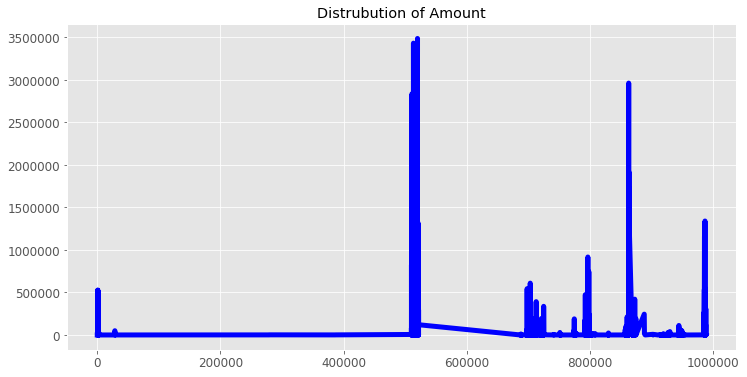

In [320]:
df.value[(df.measure == 'الكمية')].plot( 
        figsize= (12, 6), 
      title = 'Distrubution of Amount',
      fontsize = 12,
       linewidth=5,
        color = 'blue');

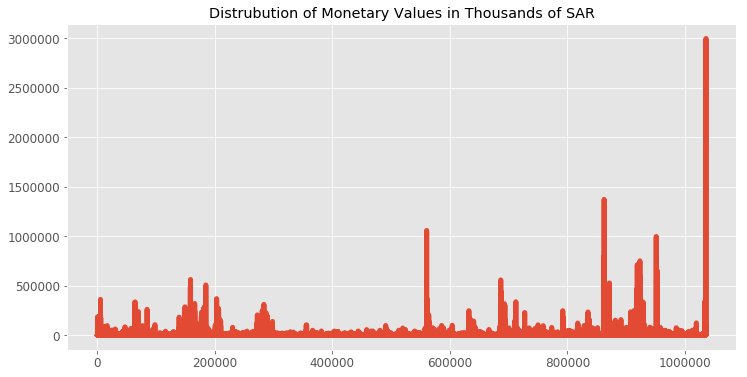

In [321]:
df.value[(df.measure == 'القيمة (بالاف الريالات)')].plot( 
        figsize= (12, 6), 
      title = 'Distrubution of Monetary Values in Thousands of SAR',
      fontsize = 12,
       linewidth=5
        );

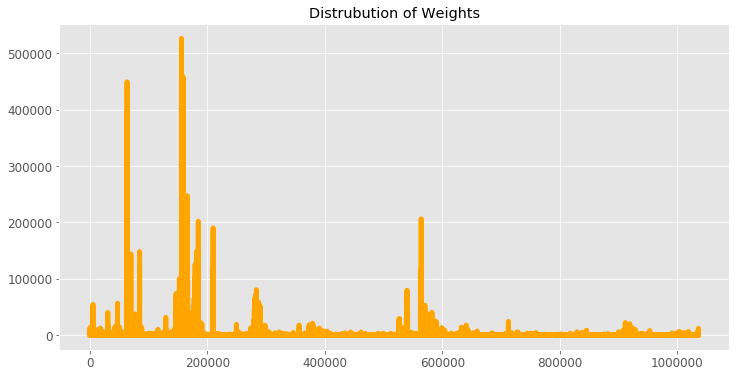

In [327]:
df.value[(df.measure == 'الوزن (بالطن)')].plot( 
        figsize= (12, 6), 
      title = 'Distrubution of Weights',
      fontsize = 12,
       linewidth=5,
    color = 'orange'
        );

In [367]:
df[['cat_num', 'cat']].groupby(["cat_num", 'cat']).count()

,
cat_num,cat
01,حيوانات حية ومنتجات حيوانية
02,منتجات نباتية
03,دهون وشحوم وزيوت وشموع نباتية وحيوانية والدهون المحضرة للأكل
04,مواد غذائية محضرة و المشروبات والخل و التبغ و أبدال تبغ مصنعة
05,المنتجات المعدنية
06,منتجات الصناعات الكيماوية وما يتصل بها
07,لدائن ومطاط ومصنوعاتهما
08,جلود خام ،ومدبوغة وفراء ومصنوعاتها
09,الأخشاب ومصنوعاته


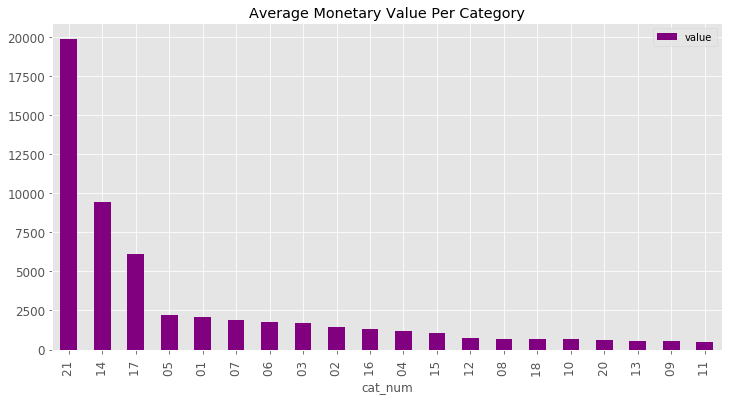

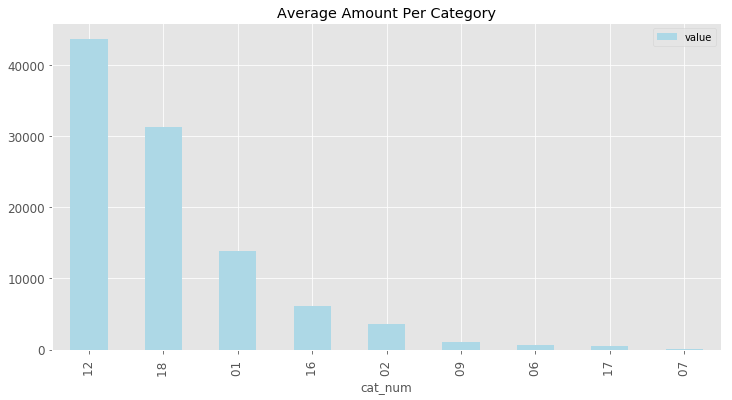

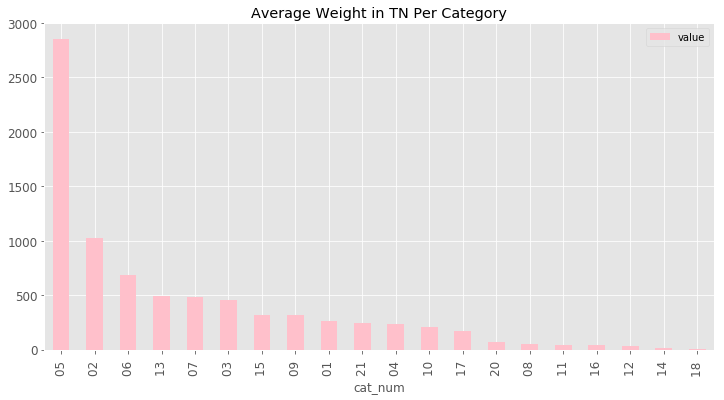

In [370]:
df[['cat_num', 'value']][df.measure == 'القيمة (بالاف الريالات)'].groupby(["cat_num"])\
.mean().sort_values('value', ascending=False).plot(kind='bar',
      figsize= (12, 6), 
      title = 'Average Monetary Value Per Category',
      fontsize = 12,
       linewidth=5,
    color = 'purple'
        ), df[['cat_num', 'value']][df.measure == 'الكمية'].groupby(["cat_num"])\
.mean().sort_values('value', ascending=False).plot(kind='bar',
      figsize= (12, 6), 
      title = 'Average Amount Per Category',
      fontsize = 12,
       linewidth=5,
    color = 'lightblue'
        ), df[['cat_num', 'value']][df.measure == 'الوزن (بالطن)'].groupby(["cat_num"])\
.mean().sort_values('value', ascending=False).plot(kind='bar',
      figsize= (12, 6), 
      title = 'Average Weight in TN Per Category',
      fontsize = 12,
       linewidth=5,
    color = 'pink'
        );

At this point I was running out of time to explore more visulaizations and budidling a dashbaord. So I decided to go into modelling and export the dataframe into a csv to play with Tabluea much mroe quickly for visualizations!

In [371]:
df.to_csv('clean_data.csv')

# Time Series Analysis

In [208]:
tsa_df = df[(df.measure == 'القيمة (بالاف الريالات)') & (df.type != 'I') ][["value", "datetime"]]

In [209]:
tsa_df.head()

,value,time
6,1.0,2016-02-01
14,48.0,2016-01-01
17,11.0,2016-01-01
25,20.0,2016-03-01
31,50.0,2016-04-01


In [210]:
tsa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121170 entries, 6 to 1035761
Data columns (total 2 columns):
value    121170 non-null float64
time     121170 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 MB


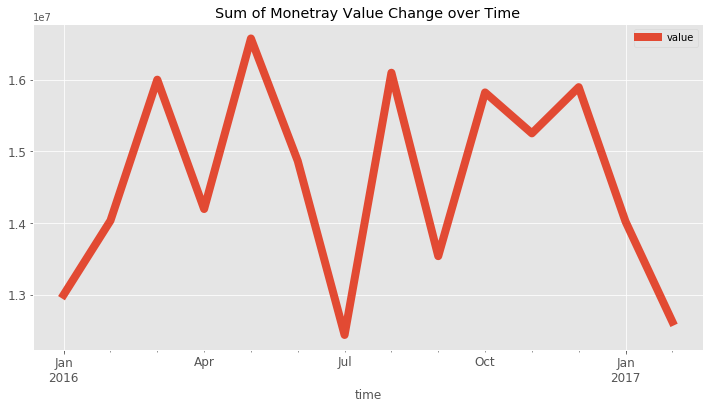

In [229]:
g = tsa_df.groupby("time").sum()
g.plot(figsize= (12, 6), 
      title = 'Sum of Monetray Value Change over Time',
      fontsize = 12,
       linewidth=8);


In [231]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error

In [233]:
g

,value
time,
2016-01-01,12998026.0
2016-02-01,14032803.0
2016-03-01,15998418.0
2016-04-01,14194335.0
2016-05-01,16572999.0
2016-06-01,14863995.0
2016-07-01,12437844.0
2016-08-01,16095317.0
2016-09-01,13536976.0


Note: I would not try and forecast the next four months based on one year data. I would reccomend just using the average until we get more data.

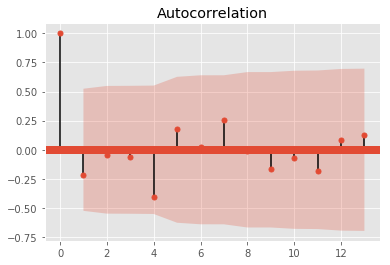

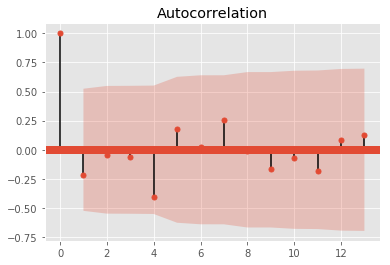

In [283]:

plot_acf(g,
       linewidth=8)

Create a test set (the most recent 6 months)

In [248]:
train, test = g[:len(g)-9], g[len(g)-9:]

Lag: 7
Coefficients: const       9.741765e-09
L1.value   -5.111103e-04
L2.value    3.460582e-01
L3.value   -4.378228e-03
L4.value    5.636660e-02
L5.value    2.845377e-01
L6.value    4.492292e-02
L7.value    2.575665e-01
dtype: float64
Test MSE: 1477347748497.164


/Users/LujFel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


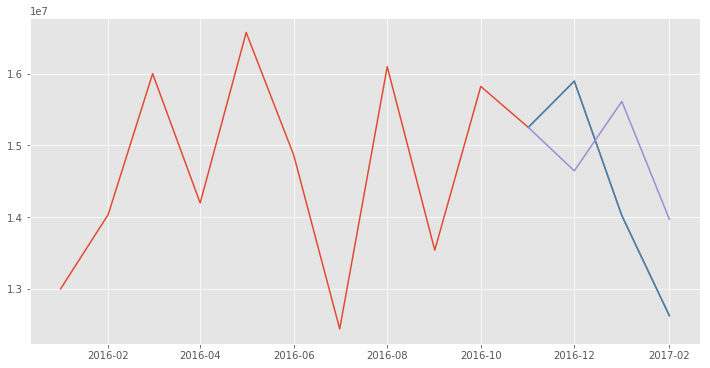

In [280]:
# split dataset
train, test = g[1:len(g)-4], g[len(g)-4:]
# train autoregression

ml = AR(train)
ml_fit = ml.fit()
print('Lag: %s' % ml_fit.k_ar)
print('Coefficients: %s' % ml_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot results
pyplot.figure(figsize = (12, 6), )
pyplot.plot(g)
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

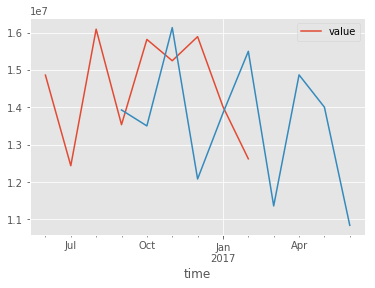

In [255]:
test.plot()
predictions.plot();

Again, I would not say the last part is very reliable for the amount of data we have but I only do it because it was asked

---